***Project Analyse des Réseaux Sociaux-Majed Ben Mansour 1er mastère BC***


**1) Introduction**:

Les réseaux sociaux en ligne, tels que Facebook, constituent des espaces d'interaction où les utilisateurs expriment leurs préférences en suivant des pages, en aimant des publications ou en établissant des connexions avec d'autres utilisateurs. Ces interactions forment des réseaux complexes qui peuvent être analysés à l'aide de méthodes issues de la théorie des graphes et de l'analyse des réseaux sociaux (SNA).

Dans cette étude, nous analysons un réseau de pages Facebook dédiées à des émissions de télévision, où chaque nœud représente une page et chaque arête indique une relation mutuelle de "like" entre deux pages. 

Notre objectif est d'explorer la structure de ce réseau en calculant des mesures clés (distribution des degrés, longueur moyenne des plus courts chemins, coefficient de clustering, densité) et en identifiant les nœuds les plus influents grâce aux mesures de centralité (degré, intermédiarité).

Commençons par l'importation de nos bibliothéques nécessaires:

In [1]:
from matplotlib import colors
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from cdlib import algorithms, evaluation
import community as community_louvain
import matplotlib.cm as cm
import warnings

warnings.filterwarnings("ignore")

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'graph_tool', 'leidenalg', 'wurlitzer', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'leidenalg'}


**2) Chargement des datasets:**

Nous chargeons les nœuds et les arêtes du graphe à partir de fichiers du dataset, cette dataset a preque 4000 noeuds, ces nœuds ont des identifiants et des noms ; les arêtes sont des connexions entre eux.

Nous importons les données du réseau à partir de deux fichiers CSV :

fb-pages-tvshow.nodes : Contient les nœuds avec leurs identifiants (new_id) et noms (name).

fb-pages-tvshow.edges : Contient les arêtes reliant les nœuds (colonnes source et target).

Un graphe networkx est créé et rempli à l'aide de ces données.

In [2]:
nodes_df = pd.read_csv("fb-pages-tvshow.nodes", sep=",")
edges_df = pd.read_csv("fb-pages-tvshow.edges", sep=",", header=None, names=["source", "target"])

G = nx.Graph()

for _, row in nodes_df.iterrows():
    G.add_node(row['new_id'], name=row['name'])

for _, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'])

print(f"Graph loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

Graph loaded: 3892 nodes, 17262 edges


**3) Distribution des degrés:** 

Cette section calcule le degré (nombre de connexions) de chaque nœud et affiche un histogramme de la fréquence des degrés.
L'histogramme révèle une distribution typique des réseaux sociaux :

La Majorité des nœuds ont un faible degré (peu de connexions), alors que quelques nœuds (à droite) ont un degré élevé, correspondant probablement aux pages les plus populaires.

Cette asymétrie suggère une structure "scale-free", où quelques hubs centraux dominent les connexions.

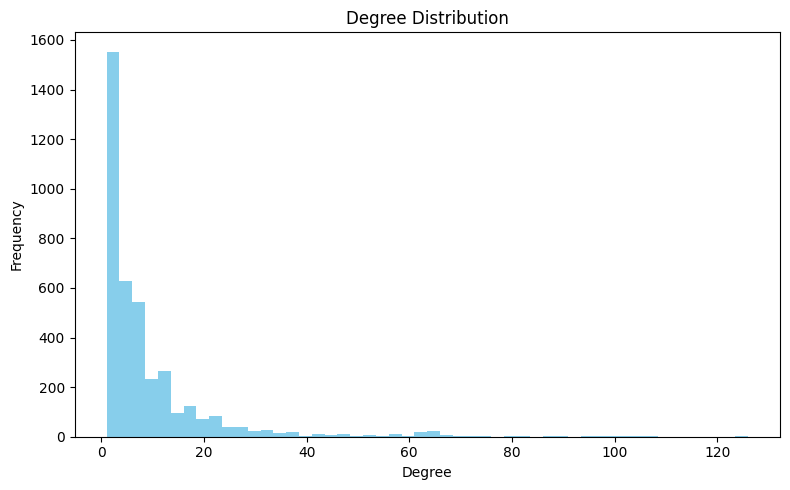

In [3]:
# Degree distribution
degree_sequence = [deg for _, deg in G.degree()]
plt.figure(figsize=(8, 5))
plt.hist(degree_sequence, bins=50, color='skyblue')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("degree_distribution.png")
plt.show()
plt.close()

**4) Analyse des composantes connexes et des chemins:**

Le graphe se compose d'une seule composante connexe géante regroupant l'intégralité des 3892 nœuds, ce qui indique que toutes les pages sont interconnectées directement ou indirectement. L'analyse des plus courts chemins révèle une distance moyenne de 6.28 entre deux pages quelconques, une valeur caractéristique des réseaux sociaux où la théorie des "six degrés de séparation" trouve souvent une illustration. 

Cette faible diamètre malgré la taille du réseau suggère une structure efficace de propagation de l'information.

In [4]:
# Composantes connectés
components = list(nx.connected_components(G))
largest_component = G.subgraph(max(components, key=len)).copy()
print(f"Number of components: {len(components)}")
print(f"Largest component size: {largest_component.number_of_nodes()} nodes")

# Trouver les chemins les plus courts (sur le plus grand composant)
avg_shortest_path_length = nx.average_shortest_path_length(largest_component)
print(f"Average shortest path length: {avg_shortest_path_length}")

Number of components: 1
Largest component size: 3892 nodes
Average shortest path length: 6.275911443991629


**5) Coefficient de clustering et densité du réseau :** 

Le code calcule d'abord le coefficient de clustering moyen (0.37), indiquant une tendance modérée des nœuds à former des groupes interconnectés. 

La densité du réseau (0.002) révèle quant à elle un graphe relativement sparse, avec peu de connexions par rapport au nombre maximal possible. Ces métriques caractérisent un réseau typique de pages Facebook où certaines communautés locales coexistent dans une structure globale peu dense.

In [5]:
# Coefficient de clustering et densité du réseau
clustering = nx.average_clustering(G)
density = nx.density(G)
print(f"Average clustering coefficient: {clustering}")
print(f"Network density: {density}")

Average clustering coefficient: 0.37373843245973964
Network density: 0.0022797490611982272


**6) Analyse de centralité :** 

Le calcul de centralité de degré révèle les nœuds les plus connectés (popularité directe), tandis que la centralité d'intermédiarité identifie ceux servant de ponts dans les chemins les plus courts (importance stratégique). 

In [6]:
# Centralité
deg_cent = nx.degree_centrality(G)
bet_cent = nx.betweenness_centrality(G)
print("Top 5 Degree Centrality:", sorted(deg_cent.items(), key=lambda x: -x[1])[:5])
print("Top 5 Betweenness Centrality:", sorted(bet_cent.items(), key=lambda x: -x[1])[:5])

Top 5 Degree Centrality: [(3254, 0.03238242097147263), (2008, 0.03238242097147263), (3525, 0.027756360832690827), (1177, 0.026728347468517093), (1673, 0.026214340786430226)]
Top 5 Betweenness Centrality: [(3254, 0.10544488181477057), (2008, 0.09352541687013562), (819, 0.08049003675871082), (2170, 0.07471499425323304), (2751, 0.07465790776474912)]


***Observation***: Les pages 3254 et 2008 apparaissent en tête des deux classements.

**7) Détection de communautés:** 

Maintenant, on va faire la detection de communité
Nous appliquons trois algorithmes pour identifier les groupes de pages fortement interconnectées :

Louvain, Propagation et Infomap.

In [7]:
# Maintenant on fait la détection de communautés, on va utiliser 3 algorithmes

# Louvain
louvain_comm = algorithms.louvain(G)
print(f"Louvain: {len(louvain_comm.communities)} communities")

# Label Propagation
label_prop = algorithms.label_propagation(G)
print(f"Label Propagation: {len(label_prop.communities)} communities")

# Infomap
infomap_comm = algorithms.infomap(G)
print(f"Infomap: {len(infomap_comm.communities)} communities")

Louvain: 46 communities
Label Propagation: 377 communities
Infomap: 291 communities


***Observation***: 

Louvain détecte 45 communautés (approche modulaire)

Propagation de labels en trouve 377 (méthode locale)

Infomap en identifie 288 (basé sur les flux d'information)

Cette divergence de résultats illustre bien comment le choix de l'algorithme influence la granularité des communautés détectées, chaque méthode ayant ses propres critères d'optimisation.

**8) Comparaison:**
Maintenant, on doit comparer les scores de modularités

In [8]:
# On va comparer les scores de modularités
modularity_scores = {
    "Louvain": evaluation.newman_girvan_modularity(G, louvain_comm).score,
    "Label Propagation": evaluation.newman_girvan_modularity(G, label_prop).score,
    "Infomap": evaluation.newman_girvan_modularity(G, infomap_comm).score
}
for method, score in modularity_scores.items():
    print(f"{method} Modularity: {score:.4f}")

Louvain Modularity: 0.8726
Label Propagation Modularity: 0.8252
Infomap Modularity: 0.0008


***Explication:*** 
Cette analyse quantitative confirme que Louvain est le plus adapté pour ce réseau de pages Facebook.

**9) Visualization:** 

Maintenant on va faire une visualization de données

Nous visualisons les 100 nœuds les plus connectés. Chaque nœud est coloré en fonction de la communauté à laquelle il appartient (Louvain). Des étiquettes sont ajoutées aux nœuds les plus importants pour le contexte.

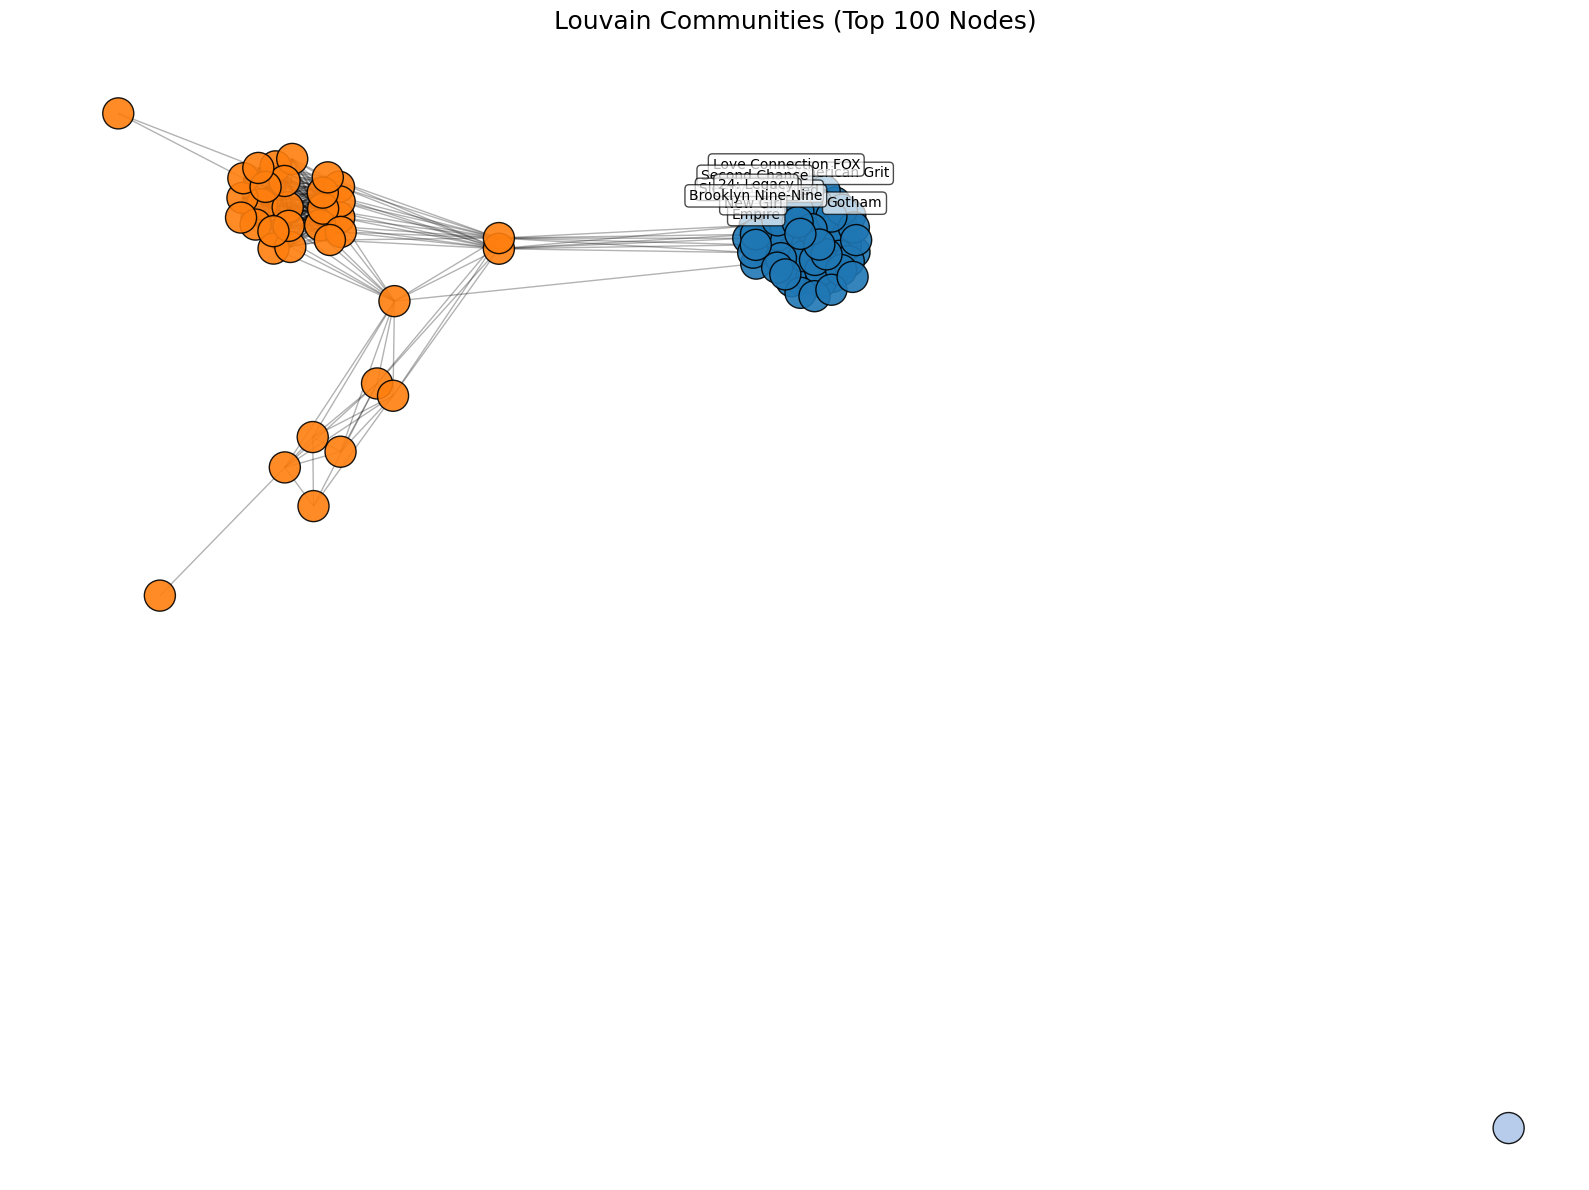

In [9]:
# On va maintenant faire la visualization

# Utiliser top 100 nodes par degree
top_n = 100
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:top_n]
subgraph = G.subgraph([n for n, _ in top_nodes])

# Louvain partition
partition = community_louvain.best_partition(subgraph)

# Plot
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm

pos = nx.spring_layout(subgraph, seed=42, k=0.5, iterations=200)  # More spacing

# Colorer les nœuds par communauté
colors = [cm.get_cmap('tab20')(partition[n] % 20) for n in subgraph.nodes()]

plt.figure(figsize=(16, 12))  # Bigger figure
nx.draw_networkx_edges(subgraph, pos, alpha=0.3, width=1)

# Dessiner les nœuds avec un contour et une transparence partielle
nx.draw_networkx_nodes(
    subgraph, pos, node_size=500, node_color=colors,
    edgecolors='black', linewidths=1, alpha=0.9
)

# Étiqueter uniquement les nœuds centraux supérieurs ou ceux de degré élevé
top_nodes = sorted(subgraph.degree, key=lambda x: -x[1])[:10]
labels = {
    n: nodes_df[nodes_df['new_id'] == n]['name'].values[0]
    for n, _ in top_nodes
}

# Afficher les étiquettes légèrement au-dessus des nœuds avec un fond blanc pour la lisibilité
for node, (x, y) in pos.items():
    if node in labels:
        plt.text(
            x, y + 0.05, labels[node], fontsize=10, ha='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3')
        )

plt.title("Louvain Communities (Top 100 Nodes)", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.savefig("louvain_fixed_cleaned.png")
plt.show()

**10) Conclusion:**

Le réseau analysé montre une structure fortement connectée, avec un petit monde de pages TV liées entre elles. Les mesures de centralité ont permis d’identifier des pages influentes, et les algorithmes de détection de communautés ont révélé des groupes bien définis, surtout avec Louvain qui offre la meilleure modularité. Cette analyse met en lumière l’organisation et les sous-groupes présents dans le réseau social.